In [372]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import datetime

In [373]:
data = []

message_to_type = {
    'afbeelding weggelaten': 'meme',
    'sticker weggelaten': 'sticker',
    'GIF weggelaten': 'GIF',
    'video weggelaten': 'video',
    'Dit bericht is verwijderd.': 'verwijderd',
}

with open('_chat.txt') as file:
    for i, line in enumerate(file.read().split('[')):
        line = line.strip('\n')
        if line != '':
            timestamp, rest = line.split('] ')
            timestamp = datetime.datetime.strptime(timestamp, "%d-%m-%Y %H:%M:%S")
            verstuurder, message = rest.split(': ', maxsplit=1)
            message = message.strip('\u200e')
            message = message.strip('\n')
            message_type = 'bericht'
            if message in message_to_type:
                message_type = message_to_type[message]
            elif 'heeft' in message:
                if 'toegevoegd' in message:
                    message_type = 'toegevoegd'
                if 'verwijderd' in message:
                    message_type = 'verwijderd'
            elif 'document weggelaten' in message:
                message_type = 'document'
            elif 'PEILING' in message:
                message_type = 'peiling'
            data.append({
                'timestamp': timestamp,
                'verstuurder': verstuurder,
                'message': message,
                'type': message_type,
            })

df = pd.DataFrame(data)
df = df[df['timestamp'] > datetime.datetime(2022,12,31,23,59,59)]
# df
# df_personen = df[df['verstuurder'] != 'MGMemes']
# df[df['verstuurder'] == 'MGMemes']
# 'wijzigen groepsnaam'
# 'toevoegen/verwijderen van personen'
# 'heeft een spraakchat gestart'

# Aantal verstuurde memes per dag

Memequinenza deed zijn naam eer aan. In deze donkergroene week werden by far de meeste memes gemaakt, waarbij op maandag 6 februari het **memerecord** is neergezet met **72 memes**. Een andere dag waarop veel ge-meme'd is, was de bouw-ALV op 3 mei. Op deze dag zijn er 70 memes verstuurd. Verder is er ook een duidelijke correllatie tussen de hoeveelheid geroei en het aantal memes: zowel de **zomer- als de kerstvakanties zijn schrale periodes** op meme-gebied

72.0


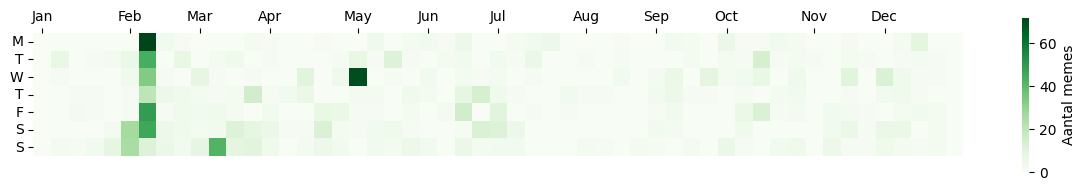

In [374]:
this_df = df[df.type == 'meme']

d_range = pd.date_range('2023-01-01', '2023-12-31', freq='D')
num_message = np.zeros((7, d_range[-1].isocalendar().week+1))
num_contributions = this_df.groupby(this_df['timestamp'].dt.date).size()
for date, count in num_contributions.items():
    isodate = date.isocalendar()
    num_message[isodate.weekday-1, isodate.week] = count

plt.figure(figsize=(15, 2))
ax = sns.heatmap(
    num_message, 
    cmap='Greens',
    cbar=True,
    cbar_kws = {'label': 'Aantal memes'},
    square=True,
    # annot=True,
)

weeks_month_start = [0.5]
month_names = ['Jan']
for month in range(2,13):
    date = datetime.date(year=2023,month=month,day=1)
    weeks_month_start.append(date.isocalendar().week + 0.5)
    month_names.append(date.strftime('%b'))

ax.set_xticks(weeks_month_start)
ax.set_xticklabels(month_names, rotation=0)

ax.set_yticklabels(
    ['M', 'T', 'W', 'T', 'F', 'S', 'S'], 
    rotation=0, 
    # ha='left',
) 
ax.xaxis.set_ticks_position('top')
# ax.tick_params(axis='x', which='both', bottom=False, top=True)
# ax.set_title('Aantal verstuurde memes')

max_value_index = np.unravel_index(np.argmax(num_message), num_message.shape)

# print(num_message[max_value_index])
plt.show()


# Top 10 bijdragers

Afgelopen jaar zijn er maar liefst **1176 memes** verstuurd. Dat is een gemiddelde van **ruim 3 memes per dag**. Maar misschien is het meest indrukwekkende wel dat van deze memes er **234 door Niek** zijn verstuurd. Dit is **bijna 20%** van het totaal!

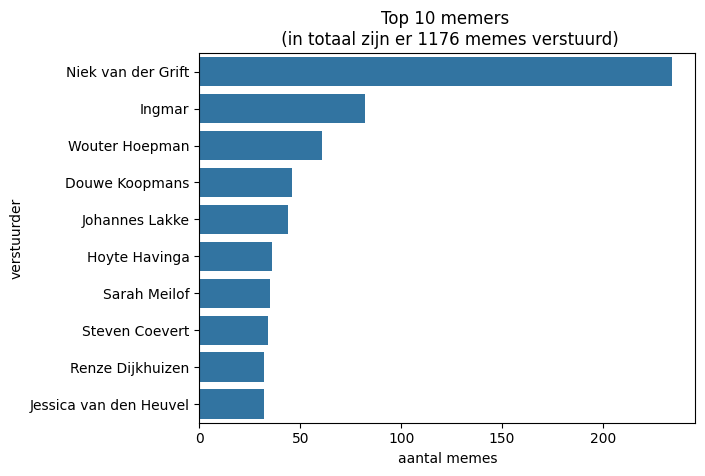

In [375]:
top_memers = df[df['type'] == 'meme'].value_counts('verstuurder').to_frame('aantal memes')
ax = sns.barplot(
    x="aantal memes", 
    y="verstuurder", 
    data=top_memers.head(10),
)
ax.set_title(f'Top 10 memers \n (in totaal zijn er {top_memers.sum().item()} memes verstuurd)')
plt.show()